In [41]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#Importing functions from UTILS.PY file
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [42]:
# Defining Network for Name Classification

class NameClassification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassification, self).__init__()

        # Tuneable parameter 
        self.hidden_size = hidden_size
        
        # Network layers 
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.input_to_output = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_state_tensor):
        # Concatenating input and hidden state 
        combined = torch.cat((input_tensor, hidden_state_tensor), 1)

        hidden_state = self.input_to_hidden(combined)
        output = self.input_to_output(combined)
        output = self.softmax(output)
        
        #returning output and hidden state
        return output, hidden_state
    
    # Intial hidden state
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)



In [43]:
#Parameters setting

n_hidden = 128
name_classifer = NameClassification(N_LETTERS, n_hidden, n_categories)
# Loss function "negative log likelihood"
criterion = nn.NLLLoss()
#learning rate
learning_rate = 0.005
# optimizer "stochastic gradient descent"
optimizer = torch.optim.SGD(name_classifer.parameters(), lr=learning_rate)

In [44]:
# Training Function

def train(line_tensor, category_tensor):
    hidden = name_classifer.init_hidden()
    # Training character by character
    for i in range(line_tensor.size()[0]):
        output, hidden = name_classifer(line_tensor[i], hidden)
    # loss calculation    
    loss = criterion(output, category_tensor)
    
    # optimizing loss with Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [45]:
# Training Loop

#loading data
category_lines, all_categories = load_data()

# intializing the loss and step veriables 
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000

# number of iteration 
n_iters = 100000

# loop for each iteration
for i in range(n_iters):

    # getting random example from the dataset --- utils.py has this function
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    # passing through train function to get loss
    loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f}")
        

5000 5.0 2.6161
10000 10.0 3.1833
15000 15.0 2.4137
20000 20.0 1.1515
25000 25.0 1.0951
30000 30.0 0.9571
35000 35.0 1.5487
40000 40.0 2.8181
45000 45.0 3.8174
50000 50.0 2.1364
55000 55.00000000000001 1.1293
60000 60.0 3.2450
65000 65.0 2.0328
70000 70.0 0.0363
75000 75.0 1.9432
80000 80.0 0.5280
85000 85.0 0.3448
90000 90.0 2.3538
95000 95.0 4.8051
100000 100.0 0.5558


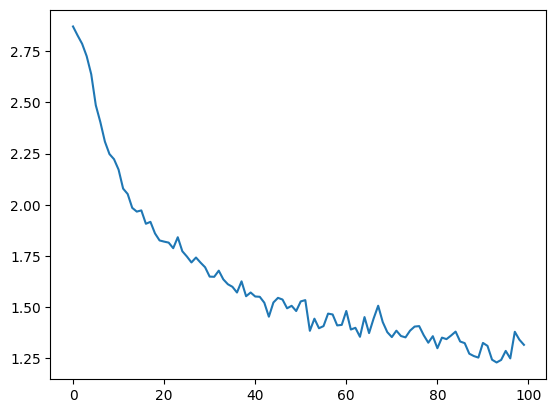

In [46]:
#ploting the loss 
plt.figure()
plt.plot(all_losses)
plt.show()